# Read USF WalkTEM

Autores

- **Paul Goyes**: [goyes.yesid@gmail.com](mailto:goyes.yesid@gmail.com)  
- **Daniela Quintero**: [yejoandajudi200305@gmail.com](mailto:yejoandajudi200305@gmail.com)  
- **Erick Villamizar**: [erickvillamizar25@gmail.com](mailto:erickvillamizar25@gmail.com) 

Importar las librerías necesarias

In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pygimli.physics import em

Pegar la ruta donde se encuentra el archivo USF

In [27]:
data = em.readusffile('20240901_110436_937_Station1.usf') # cambiar ruta del archivo usf


NSWEEPS = len(data) # ciclos del sondeo
COILSIZE1=35 #0.5×0.5 en el RC-5
COILSIZE2=1400 # 10×10 en la RC-200

dbdts1, dbdts2, dbdts4, dbdts5= [], [], [], []
tiempo_1, tiempo_2, tiempo_4, tiempo_5= [], [], [], []


# itera sobre cada ciclo del sondeo y extrae las mediciones de cada canal

for sweep in data:
    if sweep['CURRENT'] != 0:
        channel = int(sweep['CHANNEL'])
        voltage = sweep['VOLTAGE']
        current = sweep['CURRENT']
        time = sweep['TIME']
        coil_size = sweep['COIL_SIZE']

        if channel == 1:
            dbdts1.append(voltage)
            tiempo_1.append(time)
        elif channel == 2:
            dbdts2.append(voltage)
            tiempo_2.append(time)
        elif channel == 4:
            dbdts4.append(voltage)
            tiempo_4.append(time)
        elif channel == 5:
            dbdts5.append(voltage)
            tiempo_5.append(time)

Convertir las mediciones a arrays y obtener el promedio

In [28]:
# RC-5 LM
dbdt_1 = np.array(dbdts1)
dbdt_RC5_Low= np.nanmean(dbdt_1,axis=0) 
dbdt_RC5_Low.shape

(31,)

In [38]:
# RC-5 HM
dbdt_2 = np.array(dbdts2)
dbdt_RC5_High= np.nanmean(dbdt_2,axis=0)
dbdt_RC5_High.shape

(22,)

In [30]:
# RC-200 LM
dbdt_4 = np.array(dbdts4)
dbdt_RC200_Low= np.nanmean(dbdt_4,axis=0)
dbdt_RC200_Low.shape

(31,)

In [31]:
# RC-200 HM
dbdt_5 = np.array(dbdts5)
dbdt_RC200_High= np.nanmean(dbdt_5,axis=0)
dbdt_RC200_High.shape

(22,)

In [32]:
# Calcular el promedio de las LM
dbdt_low = np.mean([dbdt_RC5_Low, dbdt_RC200_Low], axis=0)
dbdt_low.shape

(31,)

In [33]:
# Calcular el promedio de las HM
dbdt_high = np.mean([dbdt_RC5_High, dbdt_RC200_High], axis=0)
dbdt_high

array([1.91871061e-03, 1.85607425e-03, 9.94370633e-04, 1.77050340e-04,
       7.56142867e-05, 4.49946855e-05, 2.59797362e-05, 1.49537570e-05,
       8.78385150e-06, 5.06012342e-06, 2.83882427e-06, 1.55434830e-06,
       8.27476090e-07, 4.32589608e-07, 2.23816416e-07, 1.12822144e-07,
       5.76702007e-08, 2.84472485e-08, 1.39132085e-08, 6.88137348e-09,
       3.63763404e-09, 1.87753891e-09])

In [34]:
# Tiempo LM
tiempo_LM = np.array(tiempo_1)
tiempo_LM= np.nanmean(tiempo_LM,axis=0)
tiempo_LM

array([2.19000e-06, 6.19000e-06, 1.01900e-05, 1.41900e-05, 1.81900e-05,
       2.26900e-05, 2.86900e-05, 3.61900e-05, 4.51900e-05, 5.66900e-05,
       7.11900e-05, 8.96900e-05, 1.13190e-04, 1.42190e-04, 1.79190e-04,
       2.25690e-04, 2.83690e-04, 3.57190e-04, 4.49690e-04, 5.66190e-04,
       7.12690e-04, 8.97190e-04, 1.12969e-03, 1.42219e-03, 1.79019e-03,
       2.25369e-03, 2.83719e-03, 3.57169e-03, 4.49669e-03, 5.66119e-03,
       7.12669e-03])

In [39]:
# Tiempo HM
tiempo_HM = np.array(tiempo_2)
tiempo_HM= np.nanmean(tiempo_HM,axis=0)
tiempo_HM

array([2.1900e-06, 6.1900e-06, 1.0190e-05, 1.4190e-05, 1.8190e-05,
       2.2690e-05, 2.8690e-05, 3.6190e-05, 4.5190e-05, 5.6690e-05,
       7.1190e-05, 8.9690e-05, 1.1319e-04, 1.4219e-04, 1.7919e-04,
       2.2569e-04, 2.8369e-04, 3.5719e-04, 4.4969e-04, 5.6619e-04,
       7.1269e-04, 8.9719e-04])

Graficar las mediciones LM y HM

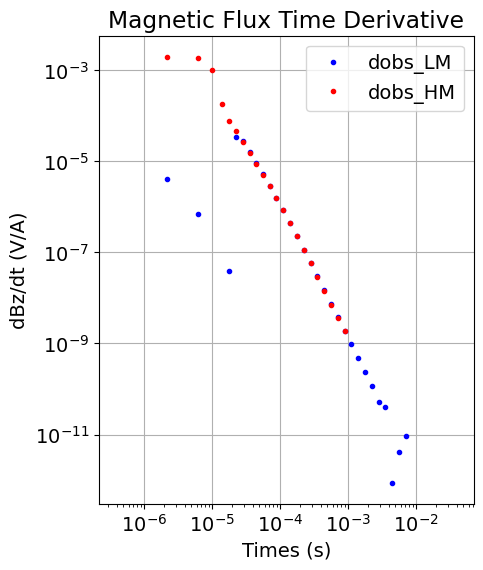

In [41]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_axes([0.2, 0.15, 0.75, 0.78])

ax.loglog(tiempo_LM, dbdt_low, "b.",  label='dobs_LM')
ax.loglog(tiempo_HM, dbdt_high, "r.", label='dobs_HM')

ax.set_xlim([tiempo_LM.min()/10, 10*tiempo_LM.max()])

ax.grid()
ax.set_xlabel("Times (s)")
ax.set_ylabel("dBz/dt (V/A)")
ax.set_title("Magnetic Flux Time Derivative")
ax.legend()
plt.show()